# Introduction

Experiment 1 measures the performance, in terms of makespan, of HEFT, the selected GA algorithm against a random planner.

In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))
tab20 = cm.get_cmap(plt.get_cmap('tab20'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

## Homogeneous workflow - Homogeneous resources

In [2]:
StHomoCampaigns_4StHomoResources = pd.read_csv('../Data/StHomoCampaigns_4StHomoResources.csv')

In [3]:
StHomoCampaigns_4StHomoResources = StHomoCampaigns_4StHomoResources.groupby(by=['planner','size'])
StHomoCampaigns_4StHomoResources_makespan_means = StHomoCampaigns_4StHomoResources.mean()
StHomoCampaigns_4StHomoResources_makespan_stds = StHomoCampaigns_4StHomoResources.std()

In [4]:
#pprint(StHomoCampaigns_4StHomoResources_makespan_means/1000)

In [5]:
#pprint(StHomoCampaigns_4StHomoResources_makespan_stds/1000)

In [6]:
workflows_sizes = [4,8,16,32,64,128,256,512,1024]
min_vals = []
max_vals = []

for size in workflows_sizes:
    min_vals.append(75000 * size / 4)
    max_vals.append(75000 * size)
    
print(min_vals, max_vals)

[75000.0, 150000.0, 300000.0, 600000.0, 1200000.0, 2400000.0, 4800000.0, 9600000.0, 19200000.0] [300000, 600000, 1200000, 2400000, 4800000, 9600000, 19200000, 38400000, 76800000]


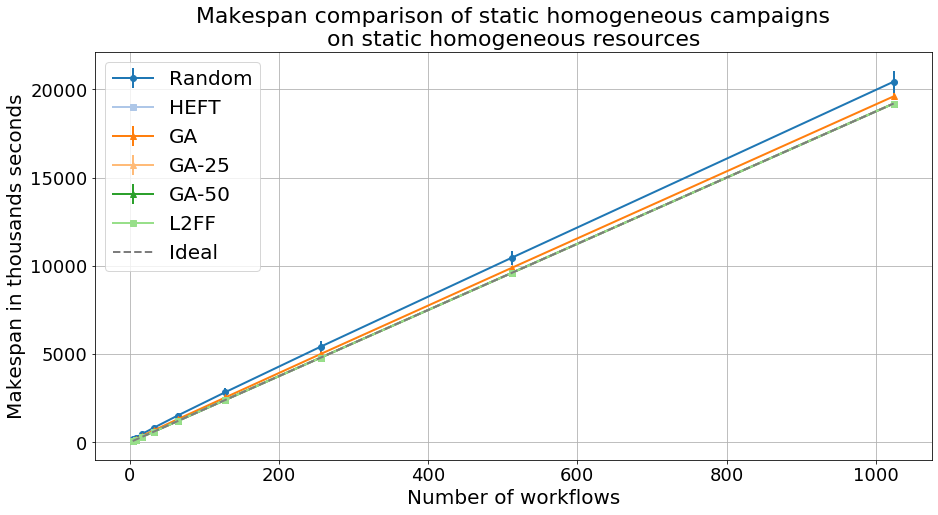

In [7]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values,StHomoCampaigns_4StHomoResources_makespan_stds.xs('RANDOM')['makespan'].values, color=tab20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4StHomoResources_makespan_means.xs('HEFT').index,StHomoCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=tab20(1),linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4StHomoResources_makespan_means.xs('GA').index, StHomoCampaigns_4StHomoResources_makespan_means.xs('GA')['makespan'].values,StHomoCampaigns_4StHomoResources_makespan_stds.xs('GA')['makespan'].values, color=tab20(2),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4StHomoResources_makespan_means.xs('GA-25').index, StHomoCampaigns_4StHomoResources_makespan_means.xs('GA-25')['makespan'].values,StHomoCampaigns_4StHomoResources_makespan_stds.xs('GA-25')['makespan'].values, color=tab20(3),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4StHomoResources_makespan_means.xs('GA-50').index, StHomoCampaigns_4StHomoResources_makespan_means.xs('GA-50')['makespan'].values,StHomoCampaigns_4StHomoResources_makespan_stds.xs('GA-50')['makespan'].values, color=tab20(4),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4StHomoResources_makespan_means.xs('L2FF').index,StHomoCampaigns_4StHomoResources_makespan_means.xs('L2FF')['makespan'].values,marker='s',label='L2FF', color=tab20(5),linewidth=2)
_ = axis.errorbar([4, 8, 16, 32, 64, 128, 256, 512, 1024], min_vals, linestyle='--',label='Ideal', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
# _ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')
#fig.savefig('StHomoCampaigns_4StHomoResources.pdf',bbox_inches='tight')

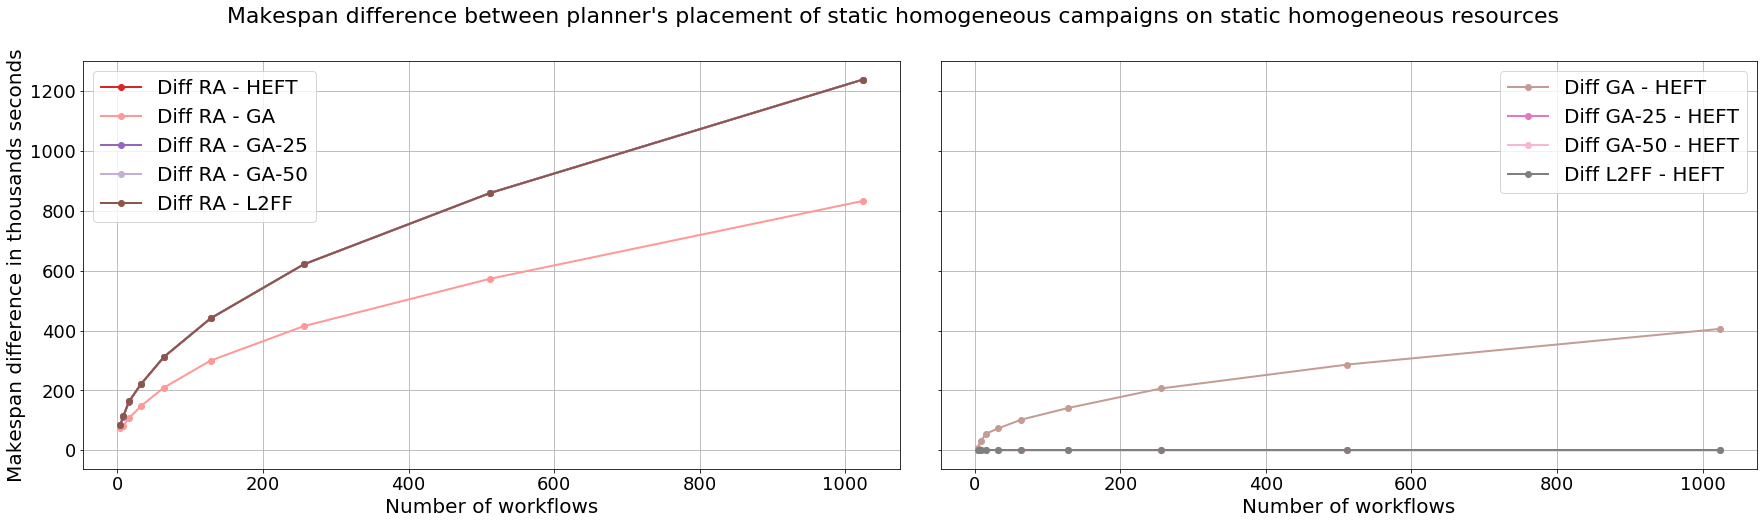

In [8]:
DiffStHomoCamp_4StHomoResHE = abs(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResGA = abs(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4StHomoResources_makespan_means.xs('GA')['makespan'].values)
DiffStHomoCamp_4StHomoResGA25 = abs(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4StHomoResources_makespan_means.xs('GA-25')['makespan'].values)
DiffStHomoCamp_4StHomoResGA50 = abs(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4StHomoResources_makespan_means.xs('GA-50')['makespan'].values)
DiffStHomoCamp_4StHomoResL2 = abs(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4StHomoResources_makespan_means.xs('L2FF')['makespan'].values)

DiffStHomoCamp_4StHomoResHEGA = (StHomoCampaigns_4StHomoResources_makespan_means.xs('GA')['makespan'].values - StHomoCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA25 = (StHomoCampaigns_4StHomoResources_makespan_means.xs('GA-25')['makespan'].values - StHomoCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA50 = (StHomoCampaigns_4StHomoResources_makespan_means.xs('GA-50')['makespan'].values - StHomoCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResHEL2 = (StHomoCampaigns_4StHomoResources_makespan_means.xs('L2FF')['makespan'].values - StHomoCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values)

fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(30,7.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
_ = axis[0].plot(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=tab20(6))
_ = axis[0].plot(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=tab20(7))
_ = axis[0].plot(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA25, marker='o',linewidth=2, label='Diff RA - GA-25', color=tab20(8))
_ = axis[0].plot(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA50, marker='o',linewidth=2, label='Diff RA - GA-50', color=tab20(9))
_ = axis[0].plot(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResL2, marker='o',linewidth=2, label='Diff RA - L2FF', color=tab20(10))

_ = axis[1].plot(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=tab20(11))
_ = axis[1].plot(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA25, marker='o',linewidth=2, label='Diff GA-25 - HEFT', color=tab20(12))
_ = axis[1].plot(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA50, marker='o',linewidth=2, label='Diff GA-50 - HEFT', color=tab20(13))
_ = axis[1].plot(StHomoCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEL2, marker='o',linewidth=2, label='Diff L2FF - HEFT', color=tab20(14))
#_ = axis.set_yscale('symlog')
_ = axis[0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis[0].set_xlabel('Number of workflows',fontsize=20)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0].grid('on')
_ = axis[0].legend(fontsize=20)

_ = axis[1].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1].grid('on')
_ = axis[1].legend(fontsize=20)
_ = fig.suptitle("Makespan difference between planner's placement of static homogeneous campaigns on static homogeneous resources", fontsize=22)
#fig.savefig('StHomoCampaigns_4StHomoResources_diff.png',bbox_inches='tight')
#fig.savefig('StHomoCampaigns_4StHomoResources_diff.pdf',bbox_inches='tight')

In [9]:
StHeteroCampaigns_4StHomoResources = pd.read_csv('../Data/StHeteroCampaigns_4StHomoResources.csv')
StHeteroCampaigns_4StHomoResources.reset_index(drop='index',inplace=True)
#locs = [0,20000,40000,60000,80000,100000,120000,140000,160000]
#operations = []
#for loc in locs:
#    wsize = StHeteroCampaigns_4StHomoResources.loc[loc]['size']
#    plan = eval(StHeteroCampaigns_4StHomoResources.loc[loc]['plan'])
#    num_oper = []
#    for i in range(wsize):
#        num_oper.append(plan[i][0]['num_oper'])
#    operations.append(num_oper)
#min_vals = []
#max_vals = []
#
#for opers in operations:
#    max_vals.append(sum(opers))
#    equid_dist1 = []
#    equid_dist2 = []
#    equid_dist3 = []
#    equid_dist4 = []
#    opers.sort()
#    for i in range(0,len(opers),4):
#        equid_dist1.append(opers[i + 0])
#        equid_dist2.append(opers[i + 1])
#        equid_dist3.append(opers[i + 2])
#        equid_dist4.append(opers[i + 3])
#    min_vals.append(max(sum(equid_dist1),sum(equid_dist2),sum(equid_dist3),sum(equid_dist4)))
#        
StHeteroCampaigns_4StHomoResources = StHeteroCampaigns_4StHomoResources.groupby(by=['planner','size'])
StHeteroCampaigns_4StHomoResources_makespan_means = StHeteroCampaigns_4StHomoResources.mean()
StHeteroCampaigns_4StHomoResources_makespan_stds = StHeteroCampaigns_4StHomoResources.std()
#print(min_vals, max_vals)

In [10]:
#pprint(StHeteroCampaigns_4StHomoResources_makespan_means/1000)

In [11]:
#pprint(StHeteroCampaigns_4StHomoResources_makespan_stds/1000)

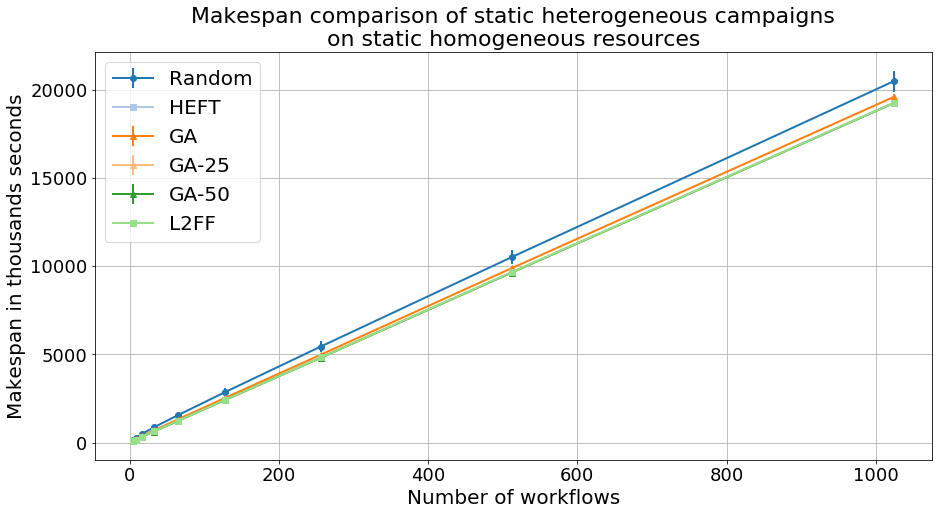

In [12]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4StHomoResources_makespan_stds.xs('RANDOM')['makespan'].values, color=tab20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4StHomoResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=tab20(1),linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA').index, StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4StHomoResources_makespan_stds.xs('GA')['makespan'].values, color=tab20(2),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA-25').index, StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA-25')['makespan'].values,StHeteroCampaigns_4StHomoResources_makespan_stds.xs('GA-25')['makespan'].values, color=tab20(3),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA-50').index, StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA-50')['makespan'].values,StHeteroCampaigns_4StHomoResources_makespan_stds.xs('GA-50')['makespan'].values, color=tab20(4),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4StHomoResources_makespan_means.xs('L2FF').index,StHeteroCampaigns_4StHomoResources_makespan_means.xs('L2FF')['makespan'].values,marker='s',label='L2FF', color=tab20(5),linewidth=2)
#_ = axis.fill_between(workflows_sizes,min_vals, max_vals, color=greens(250), alpha=0.2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns\non static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHeteroCampaigns_4StHomoResources.png',bbox_inches='tight')

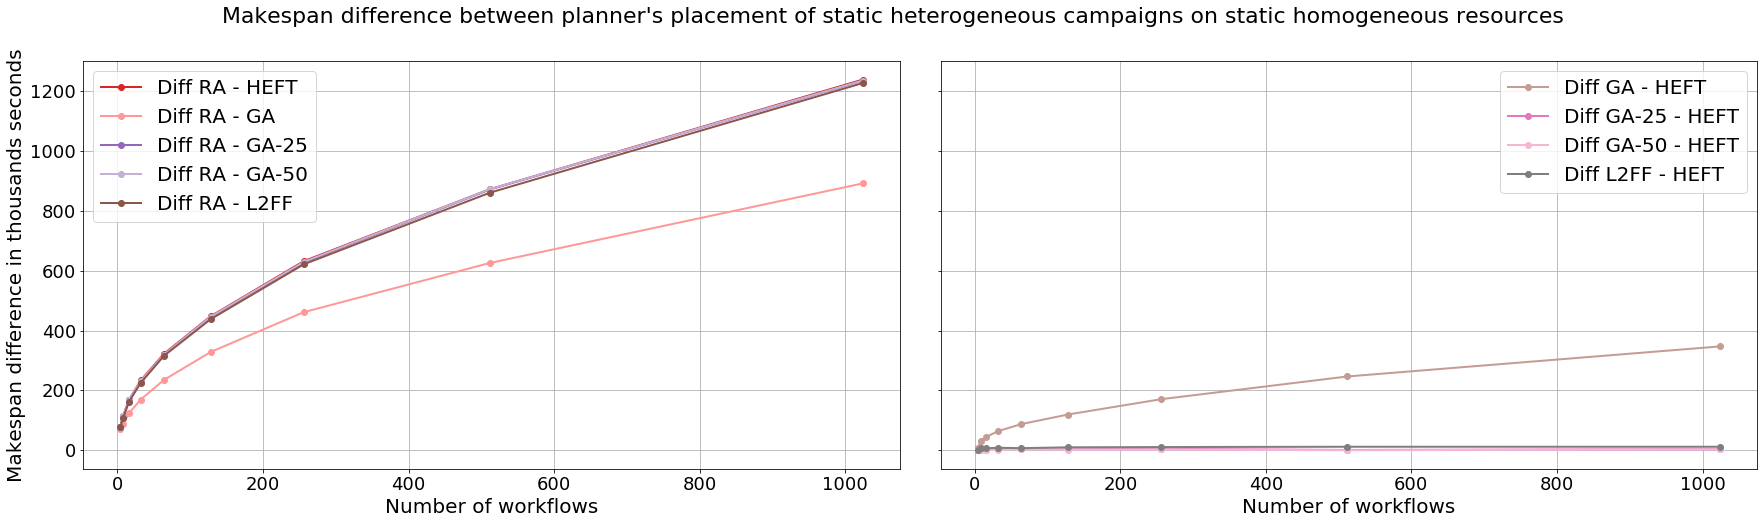

In [13]:
DiffStHeteroCamp_4StHomoResHE = abs(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4StHomoResGA = abs(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA')['makespan'].values)
DiffStHeteroCamp_4StHomoResGA25 = abs(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA-25')['makespan'].values)
DiffStHeteroCamp_4StHomoResGA50 = abs(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA-50')['makespan'].values)
DiffStHeteroCamp_4StHomoResL2 = abs(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4StHomoResources_makespan_means.xs('L2FF')['makespan'].values)

DiffStHeteroCamp_4StHomoResHEGA = (StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA')['makespan'].values - StHeteroCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4StHomoResHEGA25 = (StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA-25')['makespan'].values - StHeteroCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4StHomoResHEGA50 = (StHeteroCampaigns_4StHomoResources_makespan_means.xs('GA-50')['makespan'].values - StHeteroCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4StHomoResHEL2 = (StHeteroCampaigns_4StHomoResources_makespan_means.xs('L2FF')['makespan'].values - StHeteroCampaigns_4StHomoResources_makespan_means.xs('HEFT')['makespan'].values)

fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(30,7.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
_ = axis[0].plot(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHeteroCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=tab20(6))
_ = axis[0].plot(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHeteroCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=tab20(7))
_ = axis[0].plot(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHeteroCamp_4StHomoResGA25, marker='o',linewidth=2, label='Diff RA - GA-25', color=tab20(8))
_ = axis[0].plot(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHeteroCamp_4StHomoResGA50, marker='o',linewidth=2, label='Diff RA - GA-50', color=tab20(9))
_ = axis[0].plot(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHeteroCamp_4StHomoResL2, marker='o',linewidth=2, label='Diff RA - L2FF', color=tab20(10))

_ = axis[1].plot(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHeteroCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=tab20(11))
_ = axis[1].plot(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHeteroCamp_4StHomoResHEGA25, marker='o',linewidth=2, label='Diff GA-25 - HEFT', color=tab20(12))
_ = axis[1].plot(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHeteroCamp_4StHomoResHEGA50, marker='o',linewidth=2, label='Diff GA-50 - HEFT', color=tab20(13))
_ = axis[1].plot(StHeteroCampaigns_4StHomoResources_makespan_means.xs('RANDOM').index, DiffStHeteroCamp_4StHomoResHEL2, marker='o',linewidth=2, label='Diff L2FF - HEFT', color=tab20(14))
#_ = axis.set_yscale('symlog')
_ = axis[0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis[0].set_xlabel('Number of workflows',fontsize=20)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0].grid('on')
_ = axis[0].legend(fontsize=20)

_ = axis[1].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1].set_xticklabels(axis[1].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1].set_yticklabels((axis[1].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1].grid('on')
_ = axis[1].legend(fontsize=20)
_ = fig.suptitle("Makespan difference between planner's placement of static heterogeneous campaigns on static homogeneous resources", fontsize=22)
#fig.savefig('StHeteroCampaigns_4StHomoResources_diff.png',bbox_inches='tight')

In [14]:
StHeteroCampaigns_4St025HeteroResources = pd.read_csv('../Data/StHeteroCampaigns_4St025HeteroResources.csv')
StHeteroCampaigns_4St050HeteroResources = pd.read_csv('../Data/StHeteroCampaigns_4St050HeteroResources.csv')
StHeteroCampaigns_4St075HeteroResources = pd.read_csv('../Data/StHeteroCampaigns_4St075HeteroResources.csv')
StHeteroCampaigns_4St100HeteroResources = pd.read_csv('../Data/StHeteroCampaigns_4St100HeteroResources.csv')

In [15]:
StHeteroCampaigns_4St025HeteroResources                = StHeteroCampaigns_4St025HeteroResources.groupby(by=['planner','size'])
StHeteroCampaigns_4St025HeteroResources_makespan_means = StHeteroCampaigns_4St025HeteroResources.mean()
StHeteroCampaigns_4St025HeteroResources_stds           = StHeteroCampaigns_4St025HeteroResources.std()

StHeteroCampaigns_4St050HeteroResources                = StHeteroCampaigns_4St050HeteroResources.groupby(by=['planner','size'])
StHeteroCampaigns_4St050HeteroResources_makespan_means = StHeteroCampaigns_4St050HeteroResources.mean()
StHeteroCampaigns_4St050HeteroResources_stds           = StHeteroCampaigns_4St050HeteroResources.std()

StHeteroCampaigns_4St075HeteroResources                = StHeteroCampaigns_4St075HeteroResources.groupby(by=['planner','size'])
StHeteroCampaigns_4St075HeteroResources_makespan_means = StHeteroCampaigns_4St075HeteroResources.mean()
StHeteroCampaigns_4St075HeteroResources_stds           = StHeteroCampaigns_4St075HeteroResources.std()

StHeteroCampaigns_4St100HeteroResources                = StHeteroCampaigns_4St100HeteroResources.groupby(by=['planner','size'])
StHeteroCampaigns_4St100HeteroResources_makespan_means = StHeteroCampaigns_4St100HeteroResources.mean()
StHeteroCampaigns_4St100HeteroResources_stds           = StHeteroCampaigns_4St100HeteroResources.std()

In [16]:
#StHeteroCampaigns_4St100HeteroResources_makespan_means

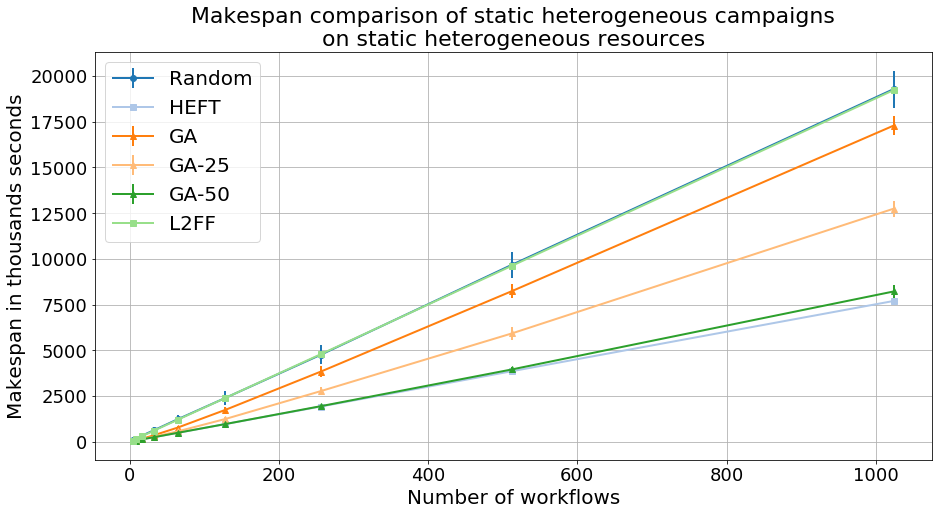

In [17]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
#_ = axis.errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St025HeteroResources_stds.xs('RANDOM')['makespan'].values,marker='o',color=blues(50),label='Random H=25%',linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St025HeteroResources_stds.xs('GA')['makespan'].values,color=greens(50),marker='^',label='GA H=25%',linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT H=25%', color=reds(50),linewidth=2)

#_ = axis.errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St050HeteroResources_stds.xs('RANDOM')['makespan'].values,color=blues(150),marker='o',label='Random H=50%',linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St050HeteroResources_stds.xs('GA')['makespan'].values,color=greens(150),marker='^',label='GA H=50%',linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT H=50%', color=reds(150),linewidth=2)

#_ = axis.errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St075HeteroResources_stds.xs('RANDOM')['makespan'].values,color=blues(250),marker='o',label='Random H=75%',linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St075HeteroResources_stds.xs('GA')['makespan'].values,color=greens(250),marker='^',label='GA H=75%',linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT H=75%', color=reds(250),linewidth=2)

_ = axis.errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St100HeteroResources_stds.xs('RANDOM')['makespan'].values,color=tab20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=tab20(1),linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St100HeteroResources_stds.xs('GA')['makespan'].values,color=tab20(2),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA-25').index, StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA-25')['makespan'].values,StHeteroCampaigns_4St100HeteroResources_stds.xs('GA-25')['makespan'].values,color=tab20(3),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA-50').index, StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA-50')['makespan'].values,StHeteroCampaigns_4St100HeteroResources_stds.xs('GA-50')['makespan'].values,color=tab20(4),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('L2FF').index,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('L2FF')['makespan'].values,marker='s',label='L2FF', color=tab20(5),linewidth=2)
#_ = axis.set_yscale('log')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns\non static heterogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHeteroCampaigns_4StHeteroResources.png',bbox_inches='tight')
#fig.savefig('StHeteroCampaigns_4StHeteroResources.pdf',bbox_inches='tight')

Text(0.5, 0.9, 'Makespan comparison of static heterogeneous campaigns on static heterogeneous resources')

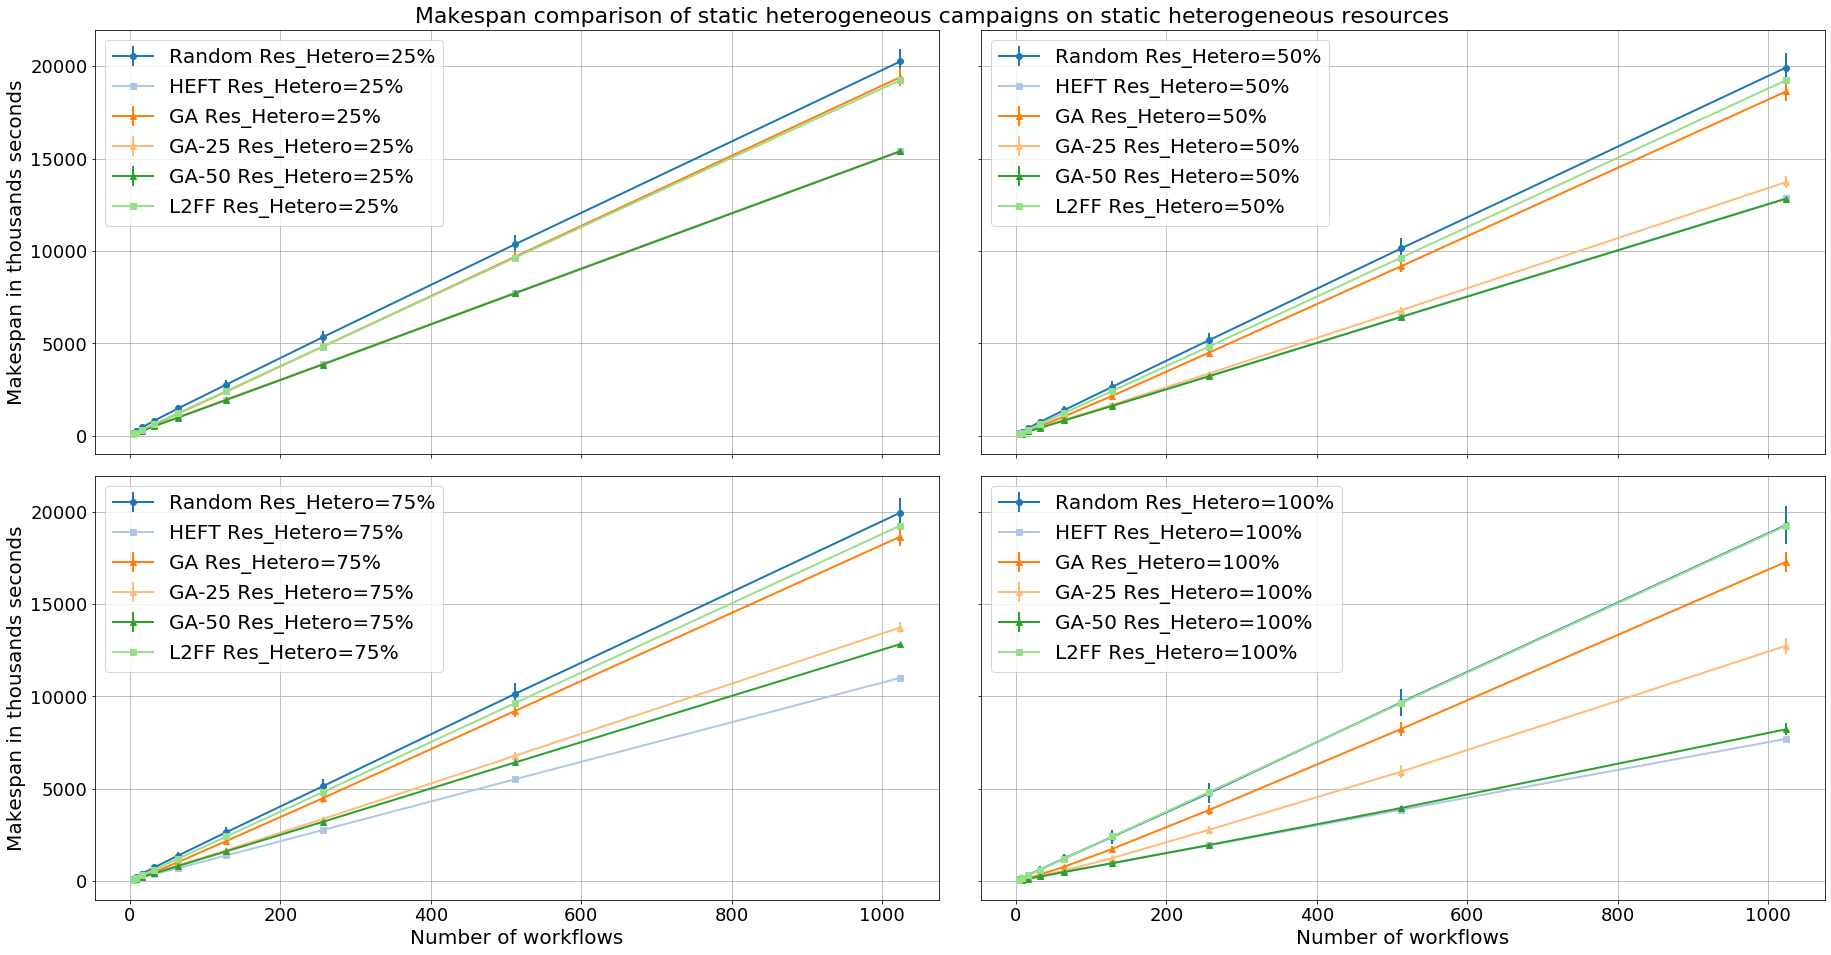

In [18]:
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(31,16), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
_ = axis[0,0].errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St025HeteroResources_stds.xs('RANDOM')['makespan'].values,color=tab20(0),marker='o',label='Random Res_Hetero=25%',linewidth=2)
_ = axis[0,0].errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT Res_Hetero=25%', color=tab20(1),linewidth=2)
_ = axis[0,0].errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St025HeteroResources_stds.xs('GA')['makespan'].values,color=tab20(2),marker='^',label='GA Res_Hetero=25%',linewidth=2)
_ = axis[0,0].errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA-25').index, StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA-25')['makespan'].values,StHeteroCampaigns_4St025HeteroResources_stds.xs('GA-25')['makespan'].values,color=tab20(3),marker='^',label='GA-25 Res_Hetero=25%',linewidth=2)
_ = axis[0,0].errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA-50').index, StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA-50')['makespan'].values,StHeteroCampaigns_4St025HeteroResources_stds.xs('GA-50')['makespan'].values,color=tab20(4),marker='^',label='GA-50 Res_Hetero=25%',linewidth=2)
_ = axis[0,0].errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('L2FF').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('L2FF')['makespan'].values,marker='s',label='L2FF Res_Hetero=25%', color=tab20(5),linewidth=2)

_ = axis[0,1].errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St050HeteroResources_stds.xs('RANDOM')['makespan'].values,color=tab20(0),marker='o',label='Random Res_Hetero=50%',linewidth=2)
_ = axis[0,1].errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT Res_Hetero=50%', color=tab20(1),linewidth=2)
_ = axis[0,1].errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St050HeteroResources_stds.xs('GA')['makespan'].values,color=tab20(2),marker='^',label='GA Res_Hetero=50%',linewidth=2)
_ = axis[0,1].errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA-25').index, StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA-25')['makespan'].values,StHeteroCampaigns_4St050HeteroResources_stds.xs('GA-25')['makespan'].values,color=tab20(3),marker='^',label='GA-25 Res_Hetero=50%',linewidth=2)
_ = axis[0,1].errorbar(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA-50').index, StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA-50')['makespan'].values,StHeteroCampaigns_4St050HeteroResources_stds.xs('GA-50')['makespan'].values,color=tab20(4),marker='^',label='GA-50 Res_Hetero=50%',linewidth=2)
_ = axis[0,1].errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('L2FF').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('L2FF')['makespan'].values,marker='s',label='L2FF Res_Hetero=50%', color=tab20(5),linewidth=2)

_ = axis[1,0].errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St075HeteroResources_stds.xs('RANDOM')['makespan'].values,color=tab20(0),marker='o',label='Random Res_Hetero=75%',linewidth=2)
_ = axis[1,0].errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT Res_Hetero=75%', color=tab20(1),linewidth=2)
_ = axis[1,0].errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St075HeteroResources_stds.xs('GA')['makespan'].values,color=tab20(2),marker='^',label='GA Res_Hetero=75%',linewidth=2)
_ = axis[1,0].errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA-25').index, StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA-25')['makespan'].values,StHeteroCampaigns_4St075HeteroResources_stds.xs('GA-25')['makespan'].values,color=tab20(3),marker='^',label='GA-25 Res_Hetero=75%',linewidth=2)
_ = axis[1,0].errorbar(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA-50').index, StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA-50')['makespan'].values,StHeteroCampaigns_4St075HeteroResources_stds.xs('GA-50')['makespan'].values,color=tab20(4),marker='^',label='GA-50 Res_Hetero=75%',linewidth=2)
_ = axis[1,0].errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('L2FF').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('L2FF')['makespan'].values,marker='s',label='L2FF Res_Hetero=75%', color=tab20(5),linewidth=2)

_ = axis[1,1].errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4St100HeteroResources_stds.xs('RANDOM')['makespan'].values,color=tab20(0),marker='o',label='Random Res_Hetero=100%',linewidth=2)
_ = axis[1,1].errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT Res_Hetero=100%', color=tab20(1),linewidth=2)
_ = axis[1,1].errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4St100HeteroResources_stds.xs('GA')['makespan'].values,color=tab20(2),marker='^',label='GA Res_Hetero=100%',linewidth=2)
_ = axis[1,1].errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA-25').index, StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA-25')['makespan'].values,StHeteroCampaigns_4St100HeteroResources_stds.xs('GA-25')['makespan'].values,color=tab20(3),marker='^',label='GA-25 Res_Hetero=100%',linewidth=2)
_ = axis[1,1].errorbar(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA-50').index, StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA-50')['makespan'].values,StHeteroCampaigns_4St100HeteroResources_stds.xs('GA-50')['makespan'].values,color=tab20(4),marker='^',label='GA-50 Res_Hetero=100%',linewidth=2)
_ = axis[1,1].errorbar(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('L2FF').index,StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('L2FF')['makespan'].values,marker='s',label='L2FF Res_Hetero=100%', color=tab20(5),linewidth=2)


_ = axis[0,0].set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis[1,0].set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis[1,0].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1,1].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1,0].set_xticklabels(axis[1,0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1,1].set_xticklabels(axis[1,1].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0,0].set_yticklabels((axis[0,0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1,0].set_yticklabels((axis[1,0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0,0].grid('on')
_ = axis[0,1].grid('on')
_ = axis[1,0].grid('on')
_ = axis[1,1].grid('on')
_ = axis[0,0].legend(fontsize=20)
_ = axis[0,1].legend(fontsize=20)
_ = axis[1,0].legend(fontsize=20)
_ = axis[1,1].legend(fontsize=20)
fig.suptitle('Makespan comparison of static heterogeneous campaigns on static heterogeneous resources', fontsize=22, y=0.9)
#fig.savefig('StHeteroCampaigns_4StHeteroResources.png',bbox_inches='tight')

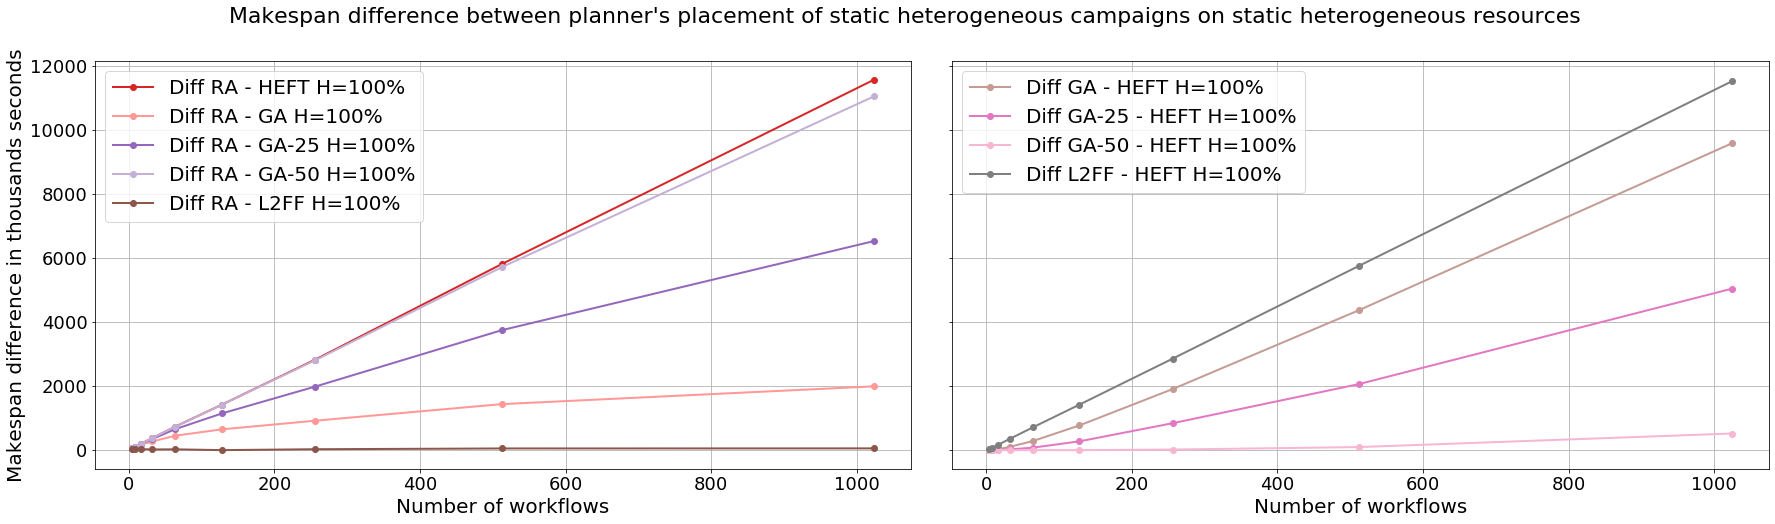

In [19]:
DiffStHeteroCamp_4St025HeteResHE = abs(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St050HeteResHE = abs(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St075HeteResHE = abs(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St100HeteResHE = abs(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT')['makespan'].values)

DiffStHeteroCamp_4St025HeteResGA = abs(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA')['makespan'].values)
DiffStHeteroCamp_4St050HeteResGA = abs(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA')['makespan'].values)
DiffStHeteroCamp_4St075HeteResGA = abs(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA')['makespan'].values)
DiffStHeteroCamp_4St100HeteResGA = abs(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA')['makespan'].values)

DiffStHeteroCamp_4St025HeteResGA25 = abs(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA-25')['makespan'].values)
DiffStHeteroCamp_4St050HeteResGA25 = abs(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA-25')['makespan'].values)
DiffStHeteroCamp_4St075HeteResGA25 = abs(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA-25')['makespan'].values)
DiffStHeteroCamp_4St100HeteResGA25 = abs(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA-25')['makespan'].values)

DiffStHeteroCamp_4St025HeteResGA50 = abs(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA-50')['makespan'].values)
DiffStHeteroCamp_4St050HeteResGA50 = abs(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA-50')['makespan'].values)
DiffStHeteroCamp_4St075HeteResGA50 = abs(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA-50')['makespan'].values)
DiffStHeteroCamp_4St100HeteResGA50 = abs(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA-50')['makespan'].values)

DiffStHeteroCamp_4St025HeteResL2 = abs(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('L2FF')['makespan'].values)
DiffStHeteroCamp_4St050HeteResL2 = abs(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('L2FF')['makespan'].values)
DiffStHeteroCamp_4St075HeteResL2 = abs(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('L2FF')['makespan'].values)
DiffStHeteroCamp_4St100HeteResL2 = abs(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('L2FF')['makespan'].values)

DiffStHeteroCamp_4St025HeteResHEGA = (StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA')['makespan'].values - StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St050HeteResHEGA = (StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA')['makespan'].values - StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St075HeteResHEGA = (StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA')['makespan'].values - StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St100HeteResHEGA = (StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA')['makespan'].values - StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT')['makespan'].values)

DiffStHeteroCamp_4St025HeteResHEGA25 = (StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA-25')['makespan'].values - StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St050HeteResHEGA25 = (StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA-25')['makespan'].values - StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St075HeteResHEGA25 = (StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA-25')['makespan'].values - StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St100HeteResHEGA25 = (StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA-25')['makespan'].values - StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT')['makespan'].values)

DiffStHeteroCamp_4St025HeteResHEGA50 = (StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('GA-50')['makespan'].values - StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St050HeteResHEGA50 = (StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('GA-50')['makespan'].values - StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St075HeteResHEGA50 = (StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('GA-50')['makespan'].values - StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St100HeteResHEGA50 = (StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('GA-50')['makespan'].values - StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT')['makespan'].values)

DiffStHeteroCamp_4St025HeteResHEL2 = (StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('L2FF')['makespan'].values - StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St050HeteResHEL2 = (StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('L2FF')['makespan'].values - StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St075HeteResHEL2 = (StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('L2FF')['makespan'].values - StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHeteroCamp_4St100HeteResHEL2 = (StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('L2FF')['makespan'].values - StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('HEFT')['makespan'].values)

fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(30,7.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
#_ = axis.plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResHE,marker='o',label='Diff RA - HEFT H=25%',linewidth=2, color=blues(50))
#_ = axis.plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResHE,marker='o',label='Diff RA - HEFT H=50%',linewidth=2, color=blues(150))
#_ = axis.plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResHE,marker='o',label='Diff RA - HEFT H=75%',linewidth=2, color=blues(250))
_ = axis[0].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResHE,marker='o',label='Diff RA - HEFT H=100%',linewidth=2, color=tab20(6))

#_ = axis.plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResGA,marker='o',label='Diff RA - GA H=25%',linewidth=2, color=reds(50))
#_ = axis.plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResGA,marker='o',label='Diff RA - GA H=50%',linewidth=2, color=reds(150))
#_ = axis.plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResGA,marker='o',label='Diff RA - GA H=75%',linewidth=2, color=reds(250))
_ = axis[0].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResGA,marker='o',label='Diff RA - GA H=100%',linewidth=2, color=tab20(7))

#_ = axis.plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResGA,marker='o',label='Diff RA - GA H=25%',linewidth=2, color=reds(50))
#_ = axis.plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResGA,marker='o',label='Diff RA - GA H=50%',linewidth=2, color=reds(150))
#_ = axis.plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResGA,marker='o',label='Diff RA - GA H=75%',linewidth=2, color=reds(250))
_ = axis[0].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResGA25,marker='o',label='Diff RA - GA-25 H=100%',linewidth=2, color=tab20(8))

#_ = axis.plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResGA,marker='o',label='Diff RA - GA H=25%',linewidth=2, color=reds(50))
#_ = axis.plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResGA,marker='o',label='Diff RA - GA H=50%',linewidth=2, color=reds(150))
#_ = axis.plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResGA,marker='o',label='Diff RA - GA H=75%',linewidth=2, color=reds(250))
_ = axis[0].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResGA50,marker='o',label='Diff RA - GA-50 H=100%',linewidth=2, color=tab20(9))

#_ = axis.plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResGA,marker='o',label='Diff RA - GA H=25%',linewidth=2, color=reds(50))
#_ = axis.plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResGA,marker='o',label='Diff RA - GA H=50%',linewidth=2, color=reds(150))
#_ = axis.plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResGA,marker='o',label='Diff RA - GA H=75%',linewidth=2, color=reds(250))
_ = axis[0].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResL2,marker='o',label='Diff RA - L2FF H=100%',linewidth=2, color=tab20(10))

#_ = axis.plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResHEGA,marker='o',label='Diff GA - HEFT H=25%',linewidth=2, color=greens(50))
#_ = axis.plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResHEGA,marker='o',label='Diff GA - HEFT H=50%',linewidth=2, color=greens(150))
#_ = axis.plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResHEGA,marker='o',label='Diff GA - HEFT H=75%',linewidth=2, color=greens(250))
_ = axis[1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResHEGA,marker='o',label='Diff GA - HEFT H=100%',linewidth=2, color=tab20(11))

#_ = axis.plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResHEGA,marker='o',label='Diff GA - HEFT H=25%',linewidth=2, color=greens(50))
#_ = axis.plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResHEGA,marker='o',label='Diff GA - HEFT H=50%',linewidth=2, color=greens(150))
#_ = axis.plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResHEGA,marker='o',label='Diff GA - HEFT H=75%',linewidth=2, color=greens(250))
_ = axis[1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResHEGA25,marker='o',label='Diff GA-25 - HEFT H=100%',linewidth=2, color=tab20(12))

#_ = axis.plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResHEGA,marker='o',label='Diff GA - HEFT H=25%',linewidth=2, color=greens(50))
#_ = axis.plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResHEGA,marker='o',label='Diff GA - HEFT H=50%',linewidth=2, color=greens(150))
#_ = axis.plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResHEGA,marker='o',label='Diff GA - HEFT H=75%',linewidth=2, color=greens(250))
_ = axis[1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResHEGA50,marker='o',label='Diff GA-50 - HEFT H=100%',linewidth=2, color=tab20(13))

#_ = axis.plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResHEGA,marker='o',label='Diff GA - HEFT H=25%',linewidth=2, color=greens(50))
#_ = axis.plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResHEGA,marker='o',label='Diff GA - HEFT H=50%',linewidth=2, color=greens(150))
#_ = axis.plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResHEGA,marker='o',label='Diff GA - HEFT H=75%',linewidth=2, color=greens(250))
_ = axis[1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResHEL2,marker='o',label='Diff L2FF - HEFT H=100%',linewidth=2, color=tab20(14))


_ = axis[0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis[0].set_xlabel('Number of workflows',fontsize=20)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0].grid('on')
_ = axis[0].legend(fontsize=20)

_ = axis[1].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1].set_xticklabels(axis[1].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1].set_yticklabels((axis[1].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1].grid('on')
_ = axis[1].legend(fontsize=20)
_ = fig.suptitle("Makespan difference between planner's placement of static heterogeneous campaigns on static heterogeneous resources", fontsize=22)
#fig.savefig('StHeteroCampaigns_4StHeteroResources_diff.pdf',bbox_inches='tight')

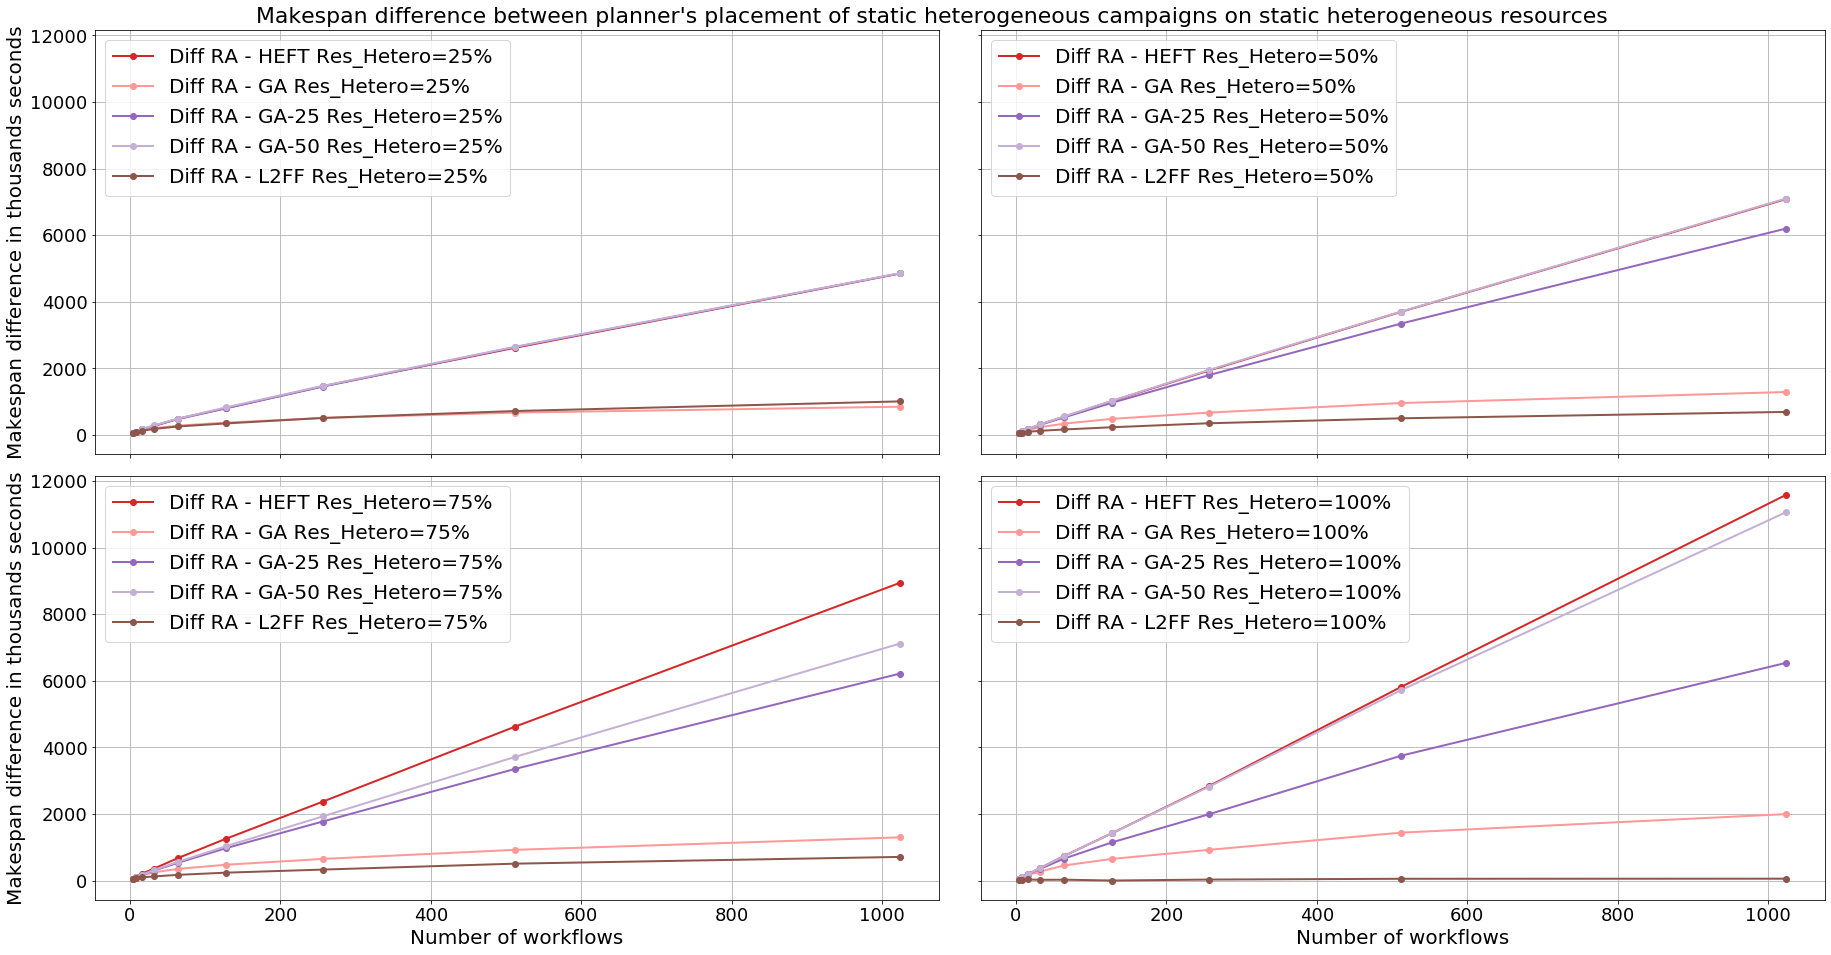

In [20]:
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(31,16), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
_ = axis[0,0].plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResHE,marker='o',label='Diff RA - HEFT Res_Hetero=25%',linewidth=2, color=tab20(6))
_ = axis[0,1].plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResHE,marker='o',label='Diff RA - HEFT Res_Hetero=50%',linewidth=2, color=tab20(6))
_ = axis[1,0].plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResHE,marker='o',label='Diff RA - HEFT Res_Hetero=75%',linewidth=2, color=tab20(6))
_ = axis[1,1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResHE,marker='o',label='Diff RA - HEFT Res_Hetero=100%',linewidth=2, color=tab20(6))

_ = axis[0,0].plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResGA,marker='o',label='Diff RA - GA Res_Hetero=25%',linewidth=2, color=tab20(7))
_ = axis[0,1].plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResGA,marker='o',label='Diff RA - GA Res_Hetero=50%',linewidth=2, color=tab20(7))
_ = axis[1,0].plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResGA,marker='o',label='Diff RA - GA Res_Hetero=75%',linewidth=2, color=tab20(7))
_ = axis[1,1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResGA,marker='o',label='Diff RA - GA Res_Hetero=100%',linewidth=2, color=tab20(7))

_ = axis[0,0].plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResGA25,marker='o',label='Diff RA - GA-25 Res_Hetero=25%',linewidth=2, color=tab20(8))
_ = axis[0,1].plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResGA25,marker='o',label='Diff RA - GA-25 Res_Hetero=50%',linewidth=2, color=tab20(8))
_ = axis[1,0].plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResGA25,marker='o',label='Diff RA - GA-25 Res_Hetero=75%',linewidth=2, color=tab20(8))
_ = axis[1,1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResGA25,marker='o',label='Diff RA - GA-25 Res_Hetero=100%',linewidth=2, color=tab20(8))

_ = axis[0,0].plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResGA50,marker='o',label='Diff RA - GA-50 Res_Hetero=25%',linewidth=2, color=tab20(9))
_ = axis[0,1].plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResGA50,marker='o',label='Diff RA - GA-50 Res_Hetero=50%',linewidth=2, color=tab20(9))
_ = axis[1,0].plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResGA50,marker='o',label='Diff RA - GA-50 Res_Hetero=75%',linewidth=2, color=tab20(9))
_ = axis[1,1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResGA50,marker='o',label='Diff RA - GA-50 Res_Hetero=100%',linewidth=2, color=tab20(9))

_ = axis[0,0].plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResL2,marker='o',label='Diff RA - L2FF Res_Hetero=25%',linewidth=2, color=tab20(10))
_ = axis[0,1].plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResL2,marker='o',label='Diff RA - L2FF Res_Hetero=50%',linewidth=2, color=tab20(10))
_ = axis[1,0].plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResL2,marker='o',label='Diff RA - L2FF Res_Hetero=75%',linewidth=2, color=tab20(10))
_ = axis[1,1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResL2,marker='o',label='Diff RA - L2FF Res_Hetero=100%',linewidth=2, color=tab20(10))

_ = axis[0,0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis[1,0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis[1,0].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1,1].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1,0].set_xticklabels(axis[1,0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1,1].set_xticklabels(axis[1,1].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0,0].set_yticklabels((axis[0,0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1,0].set_yticklabels((axis[1,0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0,0].grid('on')
_ = axis[0,1].grid('on')
_ = axis[1,0].grid('on')
_ = axis[1,1].grid('on')
_ = axis[0,0].legend(fontsize=20, loc='upper left')
_ = axis[0,1].legend(fontsize=20, loc='upper left')
_ = axis[1,0].legend(fontsize=20, loc='upper left')
_ = axis[1,1].legend(fontsize=20, loc='upper left')
_ = fig.suptitle("Makespan difference between planner's placement of static heterogeneous campaigns on static heterogeneous resources", fontsize=22,y=0.9)
#fig.savefig('StHeteroCampaigns_4StHeteroResources_diff.png',bbox_inches='tight')

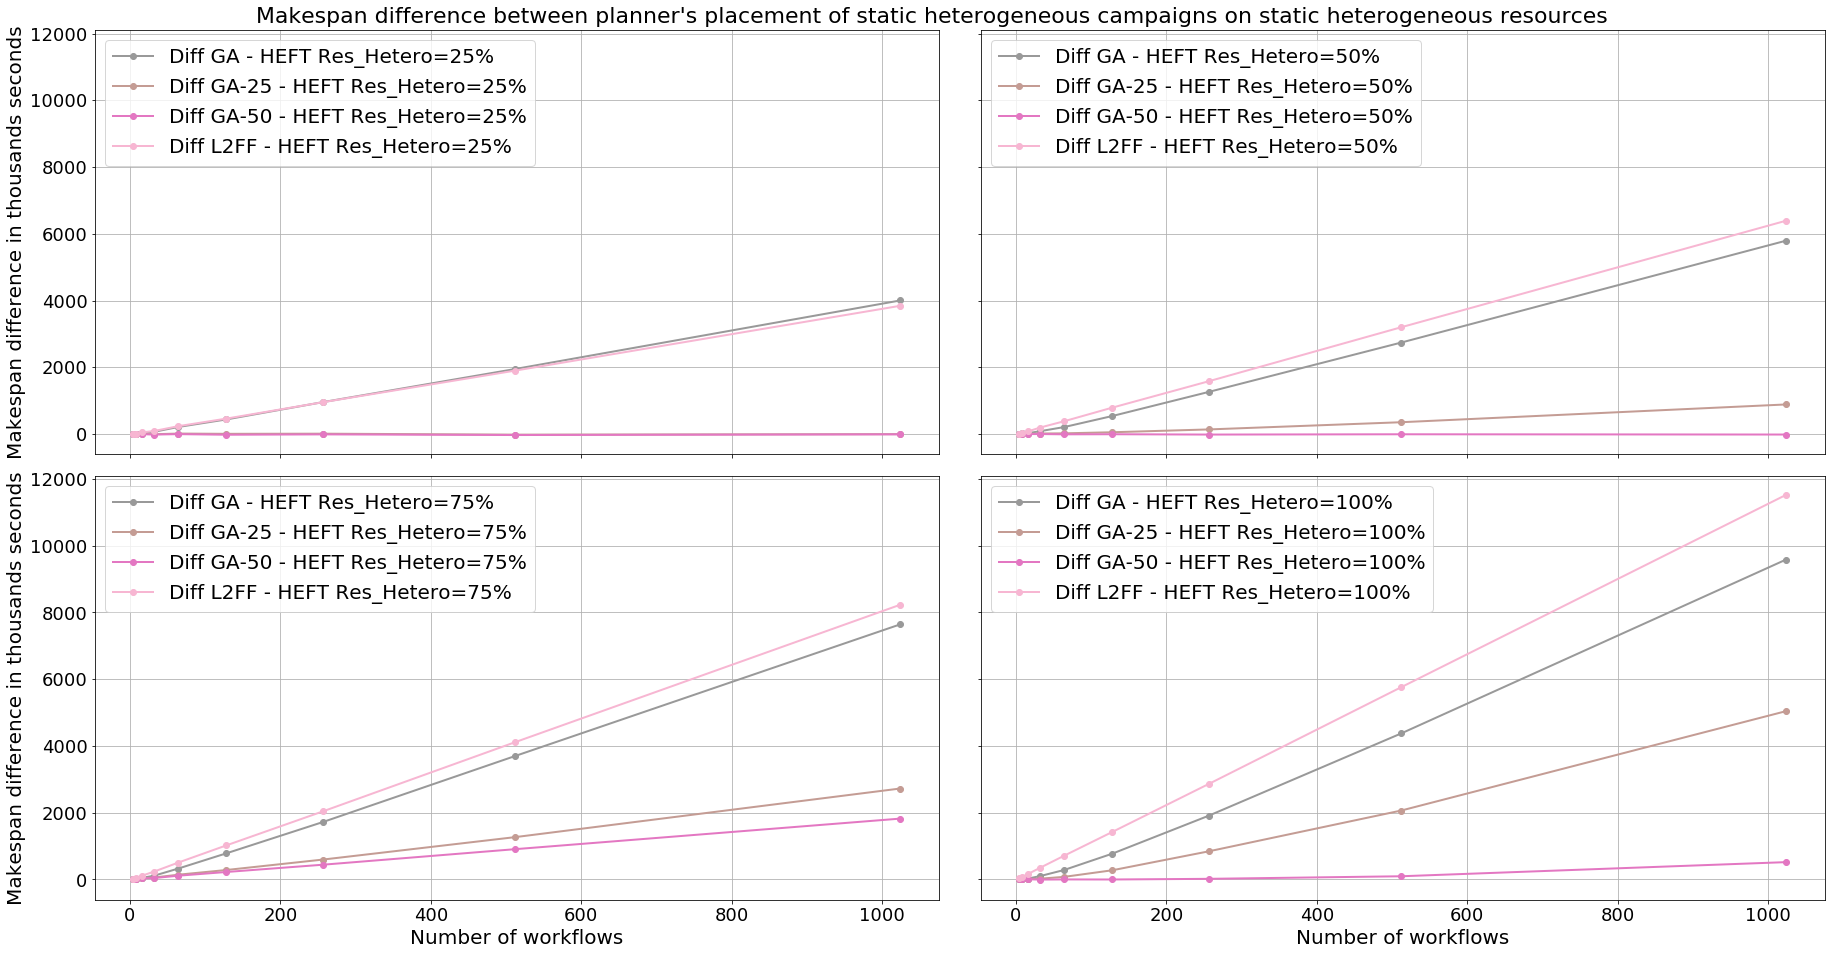

In [21]:
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(31,16), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
_ = axis[0,0].plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResHEGA,marker='o',label='Diff GA - HEFT Res_Hetero=25%',linewidth=2, color=set1(11))
_ = axis[0,1].plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResHEGA,marker='o',label='Diff GA - HEFT Res_Hetero=50%',linewidth=2, color=set1(11))
_ = axis[1,0].plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResHEGA,marker='o',label='Diff GA - HEFT Res_Hetero=75%',linewidth=2, color=set1(11))
_ = axis[1,1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResHEGA,marker='o',label='Diff GA - HEFT Res_Hetero=100%',linewidth=2, color=set1(11))

_ = axis[0,0].plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResHEGA25,marker='o',label='Diff GA-25 - HEFT Res_Hetero=25%',linewidth=2, color=tab20(11))
_ = axis[0,1].plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResHEGA25,marker='o',label='Diff GA-25 - HEFT Res_Hetero=50%',linewidth=2, color=tab20(11))
_ = axis[1,0].plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResHEGA25,marker='o',label='Diff GA-25 - HEFT Res_Hetero=75%',linewidth=2, color=tab20(11))
_ = axis[1,1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResHEGA25,marker='o',label='Diff GA-25 - HEFT Res_Hetero=100%',linewidth=2, color=tab20(11))

_ = axis[0,0].plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResHEGA50,marker='o',label='Diff GA-50 - HEFT Res_Hetero=25%',linewidth=2, color=tab20(12))
_ = axis[0,1].plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResHEGA50,marker='o',label='Diff GA-50 - HEFT Res_Hetero=50%',linewidth=2, color=tab20(12))
_ = axis[1,0].plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResHEGA50,marker='o',label='Diff GA-50 - HEFT Res_Hetero=75%',linewidth=2, color=tab20(12))
_ = axis[1,1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResHEGA50,marker='o',label='Diff GA-50 - HEFT Res_Hetero=100%',linewidth=2, color=tab20(12))

_ = axis[0,0].plot(StHeteroCampaigns_4St025HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St025HeteResHEL2,marker='o',label='Diff L2FF - HEFT Res_Hetero=25%',linewidth=2, color=tab20(13))
_ = axis[0,1].plot(StHeteroCampaigns_4St050HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St050HeteResHEL2,marker='o',label='Diff L2FF - HEFT Res_Hetero=50%',linewidth=2, color=tab20(13))
_ = axis[1,0].plot(StHeteroCampaigns_4St075HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St075HeteResHEL2,marker='o',label='Diff L2FF - HEFT Res_Hetero=75%',linewidth=2, color=tab20(13))
_ = axis[1,1].plot(StHeteroCampaigns_4St100HeteroResources_makespan_means.xs('RANDOM').index,DiffStHeteroCamp_4St100HeteResHEL2,marker='o',label='Diff L2FF - HEFT Res_Hetero=100%',linewidth=2, color=tab20(13))

_ = axis[0,0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis[1,0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis[1,0].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1,1].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1,0].set_xticklabels(axis[1,0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1,1].set_xticklabels(axis[1,1].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0,0].set_yticklabels((axis[0,0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1,0].set_yticklabels((axis[1,0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0,0].grid('on')
_ = axis[0,1].grid('on')
_ = axis[1,0].grid('on')
_ = axis[1,1].grid('on')
_ = axis[0,0].legend(fontsize=20, loc='upper left')
_ = axis[0,1].legend(fontsize=20, loc='upper left')
_ = axis[1,0].legend(fontsize=20, loc='upper left')
_ = axis[1,1].legend(fontsize=20, loc='upper left')
_ = fig.suptitle("Makespan difference between planner's placement of static heterogeneous campaigns on static heterogeneous resources", fontsize=22,y=0.9)
#fig.savefig('StHeteroCampaigns_4StHeteroResources_diff.png',bbox_inches='tight')